In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
x=np.loadtxt('ex3Data/ex3x.dat')
y=np.loadtxt('ex3Data/ex3y.dat')

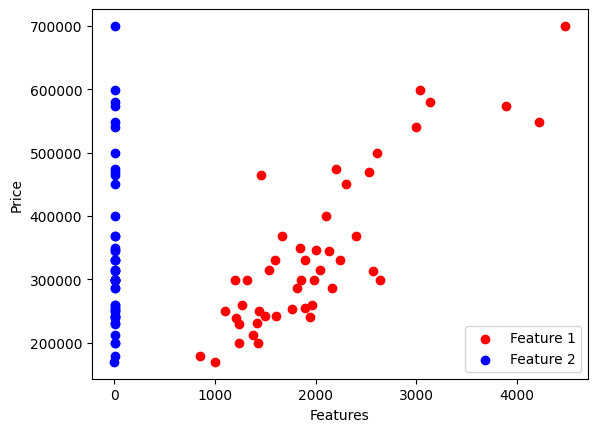

In [5]:
plt.scatter(x[:, 0], y, color='r', label='Feature 1')
plt.scatter(x[:, 1], y, color='b', label='Feature 2')
plt.xlabel('Features')
plt.ylabel('Price')
plt.legend()
plt.show()

In [6]:
X=np.ones((x.shape[0], x.shape[1]+1))
X[:, 1:]=x

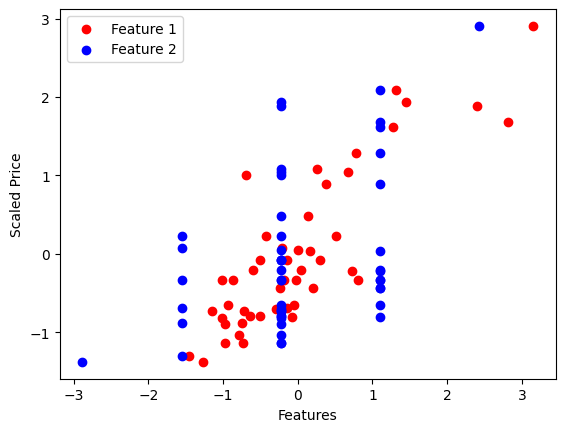

In [7]:
# Calculate the mean and standard deviation of each feature
mean = np.mean(X[:, 1:], axis=0)
std = np.std(X[:, 1:], axis=0)

# Scale the features
X[:, 1:] = (X[:, 1:] - mean) / std

# print(X)
# Scale y
y_mean = np.mean(y)
y_std = np.std(y)
y_scaled = (y - y_mean) / y_std

# Plot the scaled features and scaled y
plt.scatter(X[:, 1], y_scaled, color='r', label='Feature 1')
plt.scatter(X[:, 2], y_scaled, color='b', label='Feature 2')
plt.xlabel('Features')
plt.ylabel('Scaled Price')
plt.legend()
plt.show()

In [8]:
def hyposthesis(x,w):
    return np.dot(x, w)

In [9]:
def cost(x,y,w):
    return 1/(2*x.shape[0])*np.sum((hyposthesis(x,w)-y)**2)

In [10]:
def gradient(x,y,w):
    return 1/x.shape[0]*np.dot(x.T, (hyposthesis(x,w)-y))

In [11]:
def gradient_desent(x,y,w,learningRate,epochs):
    cost_history = np.zeros(epochs)
    for i in range(epochs):
        w=w-learningRate*gradient(x,y,w)
        if i%100==0:
            print(f"epochs {i}/{epochs} costs:{cost(x,y,w)}")
        cost_history[i]=cost(x,y,w)
    return w, cost_history

epochs 0/50000 costs:0.49990734688242205
epochs 100/50000 costs:0.4907770068330095
epochs 200/50000 costs:0.48190853255480853
epochs 300/50000 costs:0.4732940426643315
epochs 400/50000 costs:0.464925896464927
epochs 500/50000 costs:0.45679668656539785
epochs 600/50000 costs:0.4488992317252684
epochs 700/50000 costs:0.4412265699197347
epochs 800/50000 costs:0.433771951617552
epochs 900/50000 costs:0.42652883326532065
epochs 1000/50000 costs:0.4194908709718258
epochs 1100/50000 costs:0.41265191438629184
epochs 1200/50000 costs:0.406006000764592
epochs 1300/50000 costs:0.3995473492176409
epochs 1400/50000 costs:0.3932703551363751
epochs 1500/50000 costs:0.38716958478789537
epochs 1600/50000 costs:0.3812397700775174
epochs 1700/50000 costs:0.3754758034716298
epochs 1800/50000 costs:0.36987273307642693
epochs 1900/50000 costs:0.3644257578677221
epochs 2000/50000 costs:0.35913022306720593
epochs 2100/50000 costs:0.35398161566064895
epochs 2200/50000 costs:0.3489755600536905
epochs 2300/50000

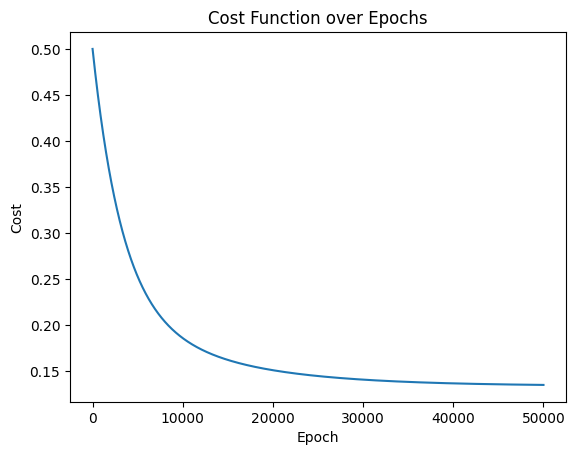

In [12]:
# Run gradient descent
initial_weights = np.array([0, 0,0])
learning_rate = 0.0001
epochs = 50000

final_weights, cost_history = gradient_desent(X, y_scaled, initial_weights, learning_rate, epochs)
print('Final weights:', final_weights)
# Visualize the cost function for each epoch

plt.plot(range(epochs),cost_history)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost Function over Epochs')
plt.show()

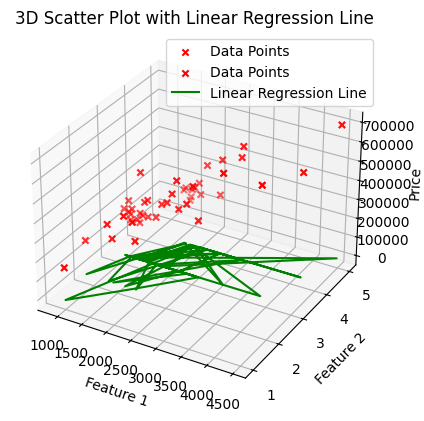

In [13]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the data
ax.scatter(x[:, 0], x[:, 1], y, marker="x", c="r", label='Data Points')
ax.scatter(x[:, 0], x[:, 1], y, marker="x", c="r", label='Data Points')

# Plot the linear regression line
regression_line = hyposthesis(X, final_weights)
ax.plot(x[:, 0], x[:, 1], regression_line, color='g', label='Linear Regression Line')

# Add labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Price')
ax.set_title('3D Scatter Plot with Linear Regression Line')
ax.legend()

plt.show()